(sec-teleportation)=
# Quantum teleportation

## Objective 

Suppose that Alice has a qubit in an arbitrary state $|\psi\rangle$ carrying some information.  She wants to send the information to Bob who are separated from Alice by a large distance.  We learned in {numref}`sec-cxgate` that information can be transferred with CX gates but thet do not work due to the distance between them. Remarkably the information can be transferred over any distance if Alice and Bob share an entangled pair of qubits and a classical communication channel such as telephone is available.     The protocol is known as  [*quantum teleportation*](https://en.wikipedia.org/wiki/Quantum_teleportation).  Amazingly, neither direct contact between the sender's qubit and the receiver's qubit nor a messenger carries the information between them.  This protcol has important applications in quantum information processes, e.g., [*quantum repeaters*](https://en.wikipedia.org/wiki/Quantum_network#Repeaters) in [quantum network](https://en.wikipedia.org/wiki/Quantum_network).

## The protocol

Consider three qubits $q_0$, $q_1$ and $q_2$. Alice has $q_2$ which is in a super position state $\alpha |0\rangle + \beta |1\rangle$.  $q_0$ and $q_1$ are prepared in Bell state $|\Phi^{+}\rangle$ and given to Bob and Alice, respectively.  Hence, Alice has two qubits $q_1$ and $q_2$ and Bob has $q_0$.  Recall that the entanglement survives the two qubits are far apart.  We use "spooky action at a distace" to teleport the information.  
The initial state of the whole system is given by

$$
|\psi_0\rangle = \left( \alpha |0\rangle + \beta |1\rangle\right) \otimes |\Phi^{+}\rangle
$$

The quantum circuit consists of the following steps

**Step 1**

Alice applies CX$_{q_2}^{q_1}$ on the two qubits under her control.

$$
|\psi_1\rangle =\left( \alpha |0\rangle + \beta |1\rangle\right) \otimes |\Phi^{+}\rangle \quad \Rightarrow \quad  |\psi_2\rangle = \alpha |0\rangle \otimes |\Phi^{+}\rangle + \beta |1\rangle \otimes |\Psi^{+}\rangle
$$

This is a local unitary operation and thus the entanglement remains.

**Step 2**

Alice applies H on $q_2$, which is another local unitary transformation and thus the entanglement is preserved.

$$
|\psi_2\rangle = \alpha |0\rangle \otimes |\Phi^{+}\rangle + \beta |1\rangle \otimes |\Psi^{+}\rangle  \quad \Rightarrow \quad |\psi_3\rangle = \alpha |+\rangle \otimes |\Phi^{+}\rangle + \beta |-\rangle \otimes |\Psi^{+}\rangle
$$


Now, we rewrite $|\psi_2\rangle$ from the Alice's view by factoring out $q_1$ and $q_2$.

$$
|\psi_2\rangle = \frac{1}{2}\left[|00\rangle\otimes \left(\alpha|0\rangle + \beta |1\rangle\right) + |01\rangle\otimes \left(\alpha|1\rangle + \beta |0\rangle\right) + |10\rangle\otimes \left(\alpha|0\rangle - \beta |1\rangle\right) + |11\rangle\otimes \left(\alpha|1\rangle + \beta |0\rangle\right) \right]
$$

**Step 3**

Alice measures $q_1$ and $q_2$ in the computational basis.  There are four possible outcomes, $|00\rangle$, $|01\rangle$, $|10\rangle$, and $|11\rangle$ with the equal probability $\frac{1}{4}$.  The state vector collapses accordingly.   The outcomes of the measurement are listed in {numref}`table-teleport`. 

```{table} The outcome of measurement
:name: table-teleport

| Alice's outcome | Bob's state |  Classical message to Bob  | 
| :-----------: | :---------------: | :------------------: |
| $\lvert 00\rangle$ | $\alpha \lvert 0\rangle + \beta \lvert 1\rangle$ |  Do nothing. |
| $\lvert 01\rangle$ | $\alpha \lvert 1\rangle + \beta \lvert 0\rangle$ |  Apply X. |
| $\lvert 10\rangle$ | $\alpha \lvert 0\rangle - \beta \lvert 1\rangle$ |  Apply Z. |
| $\lvert 11\rangle$ | $\alpha \lvert 1\rangle - \beta \lvert 0\rangle$ |  Apply Z$\cdot$X |

```


**Step 4**

If Alice obtain $00\rangle$, then Bob's qubit is in the desired state.  Otherwise, Bob needs to transform his qubit based on the outcome of the measurement.  However, he does not know what outcome Alice obtained.  Thus Alice sends a message given in {numref}`table-teleport` to Bob through classical channel (such as telephone). In quantum circuit, this final adjustment can be done by applying CX$_{q_1}^{q_0}$ and CZ$_{q_2}^{q_0}$ after the measurement.  Note this CX and CZ are just mimicking the classical communication.

Bob follows the message.  Now, Bob has the desired state in all cases.

Notice that no unrealistic non-local operation is used in the protocol.  Alice and Bob operates only on the qubits under their control.

**Qiskit example**

$\psi\rangle = \cos(\pi/3) |0\rangle - \sin(\pi/3)|1\rangle$ is teleported from Alice to Bob. 

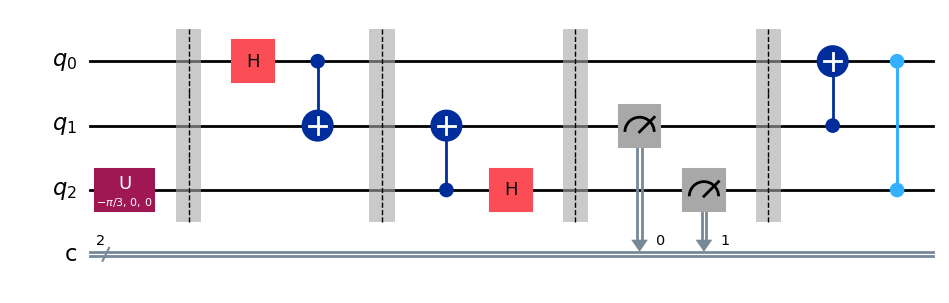

In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector, partial_trace
backend = Aer.get_backend('statevector_simulator')

cr=ClassicalRegister(2,'c')
qr=QuantumRegister(3,'q')
qc=QuantumCircuit(qr,cr)

# Generate the state Alice has
# set parameters
qc.u(-np.pi/3,0,0,2)
qc.barrier()

# form entanglement between 0 and 1
qc.h(0)
qc.cx(0,1)

# save the state
psi0=Statevector(qc)

qc.barrier()

# Step 1
qc.cx(2,1)

# Step 2
qc.h(2)

qc.barrier()

# Step 3
qc.measure([1,2],[0,1])

qc.barrier()

# Step 4
qc.cx(1,0)
qc.cz(2,0)

qc.draw('mpl')

In [2]:
result=backend.run(qc).result()
psi4 = result.get_statevector()

Alice's initial state


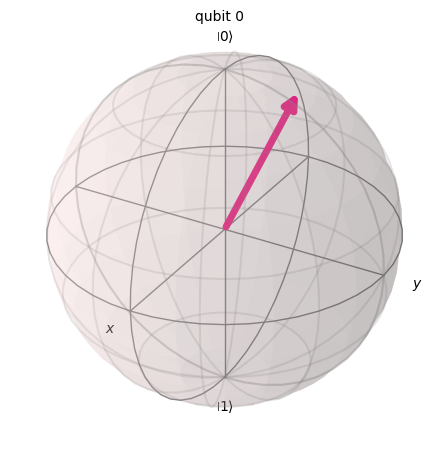

In [3]:
# Get the state of q0
# assuiming the coefficients are real.
print("Alice's initial state")
rhoA = partial_trace(psi0, [0,1])
rhoA.draw('bloch')


Bob's final state


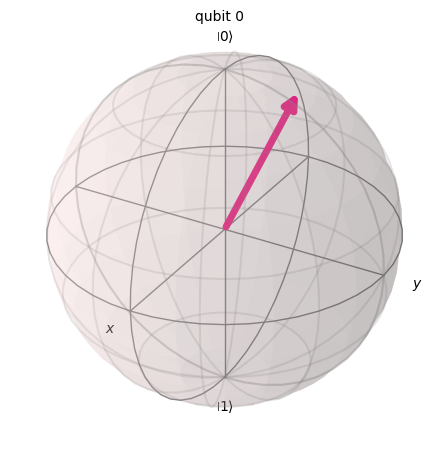

In [4]:
# Get the state of q2
# assuiming the coefficients are real.
print("Bob's final state")
rhoB = partial_trace(psi4, [1,2])
rhoB.draw('bloch')

The result shows that the state of Bob's qubit is pure and identical to the original state of Alice's qubit.

The "spooky action at a distance" can't transmit information or otherwise it violates the Einstein's theory of special relativity.  It collapses the state but Bob does not know what is the outcome.  Alice helps Bob by telling him what she found.  This classical communication send 2 bits of information since Bob needs to know one outcome out of four possibilities.  However, the no-teleportation theorem tells us that an exact state of a qubit cannot be described by any length of classical bits.  So, the classical communication did not transmit the information of $|\psi\rangle$.  It is very strange.  Neither the quantum correlation nor classical communication alone can transmit the full information but it did reach the Bob. Therefore, teleportation must have succeeded *with the help of quantum entanglement*.


---
Last Modified on 08/31/2022.